In [1]:
import sys
sys.path.append('..')

In [2]:
import numpy as np
import electrode2currentmap as e2cm
import effectivecurrent2brightness as ec2b
from scipy import interpolate
from utils import TimeSeries
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import utils

In [4]:
r = e2cm.Retina(axon_map='../retina_1700by2800.npz',
                sampling=25, ylo=-1700, yhi=1700, xlo=-2800, xhi=2800, axon_lambda=2)

In [5]:
xlist=[]
ylist=[]
rlist=[]
e_spacing=525

for x in np.arange(-2362, 2364, e_spacing):
    for y in np.arange(-1312, 1314, e_spacing):
        xlist.append(x)
        ylist.append(y)
        rlist.append(100)

e_all = e2cm.ElectrodeArray(rlist,xlist,ylist)

e_rf=[]
for e in e_all.electrodes:
    e_rf.append(e2cm.receptive_field(e, r.gridx, r.gridy,e_spacing))

In [6]:
frames = np.load('./redSquareUW_movie.npy')

In [7]:
frames.shape

(720, 1280, 73)

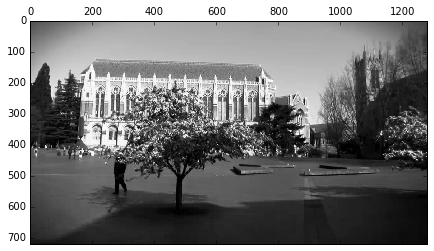

In [8]:
plt.matshow(frames[..., 0], cmap='gray')

In [9]:
i=350
j=200

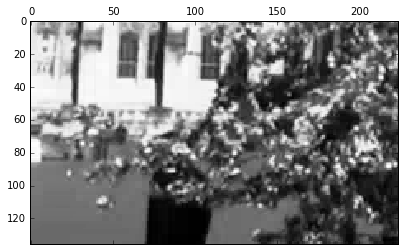

In [10]:
plt.matshow(frames[i:i+r.gridx.shape[0], j:j+r.gridx.shape[1], 0], cmap='gray')

In [11]:
pt=[]
for rf in e_rf:
    rflum = e2cm.retinalmovie2electrodtimeseries(rf, frames[i:i+r.gridx.shape[0], j:j+r.gridx.shape[1]])
    #plt.plot(rflum)
    ptrain = e2cm.Movie2Pulsetrain(rflum)
    #plt.plot(ptrain.data)
    pt.append(ptrain)


In [12]:
temporal_model = ec2b.TemporalModel()

In [ ]:
ecs, cs  = r.electrode_ecs(e_all)

In [ ]:
brightness_movie = ec2b.pulse2percept(temporal_model, ecs, r, pt, dojit=True, n_jobs=6)